<font size="4" color="purple"> TALLER DE METODOS ESTOCÁSTICOS - EJERCICIO 2 - PROBABILIDAD Y VARIABLES ALEATORIAS


*   ALUMNO: EDWIN GILBERTO AMAYA REYES
*   PROFESOR LEONARDO DAVID DONADO GARZÓN

<font size="3"> **GENERALIDADES**

In [42]:
# Importar las bibliotecas necesarias (primero se corrio todo el código con bibliotecas independientes en cada ejercicio y luego se compilaron en estas lineas para mejorar la optimizacion)
# ES OBLIGATORIO CORRER ESTA LINEA
import numpy as np
import sympy as sp
from IPython.display import display, Math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import lognorm
from sympy import symbols, Eq, solve, latex
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, pprint
from IPython.display import display
import math
from mpl_toolkits.mplot3d import Axes3D

<font size="3" > 1. La conductividad hidráulica en alguna ubicación no observada se modela con una distribución log-normal. La media de Y = ln K es 2.0 y la varianza es 1.5. ¿Cuál es la media y la varianza de K?

In [43]:
# Definir símbolos
mu_Y, sigma_Y = sp.symbols('mu_Y sigma_Y')  # sigma_Y es la desviación estándar de Y

# Función para calcular la media de K
def calcular_media_K(media_Y, varianza_Y):
    # Calculando la media de K
    media_K = sp.exp(media_Y + varianza_Y / 2)
    return media_K

# Función para calcular la varianza de K
def calcular_varianza_K(media_Y, varianza_Y):
    # Calculando la varianza de K
    primer_termino = sp.exp(varianza_Y) - 1
    segundo_termino = sp.exp(2 * media_Y + varianza_Y)
    varianza_K = primer_termino * segundo_termino
    return varianza_K

# Parámetros dados
media_Y = 2.0
varianza_Y = 1.5  # Esto es sigma_Y^2, la varianza de Y

# Calcular media y varianza de K
media_K = calcular_media_K(media_Y, varianza_Y)
varianza_K = calcular_varianza_K(media_Y, varianza_Y)

# Procedimiento
print("Paso 0: Parámetros dados:")
display(Math(r'\text{{Media de }} Y = \ln(K): \mu_Y = {}'.format(sp.latex(media_Y))))
display(Math(r'\text{{Varianza de }} Y = \ln(K): \sigma_Y^2 = {}'.format(sp.latex(varianza_Y))))

print("\nResultados:")
print("Paso 1: Cálculo de la media de K (E[K]):")
expr = sp.exp(mu_Y + sigma_Y**2 / 2)
display(Math(r'E[K] = {}'.format(sp.latex(expr))))
expr_subs = expr.subs({mu_Y: media_Y, sigma_Y: np.sqrt(varianza_Y)})
display(Math(r'E[K] = {}'.format(sp.latex(expr_subs))))
print("Calculando el valor numérico obtenemos:")
print("E[K] =", round(expr_subs.evalf(), 4))

print("\nPaso 2: Cálculo de la varianza de K (Var[K]):")
expr = (sp.exp(sigma_Y**2) - 1) * sp.exp(2 * mu_Y + sigma_Y**2)
display(Math(r'\text{{Var}}[K] = {}'.format(sp.latex(expr))))
expr_subs = expr.subs({mu_Y: media_Y, sigma_Y: np.sqrt(varianza_Y)})
display(Math(r'\text{{Var}}[K] = {}'.format(sp.latex(expr_subs))))
print("Calculando el valor numérico obtenemos:")
print("Var[K] =", round(expr_subs.evalf(), 4))

Paso 0: Parámetros dados:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Resultados:
Paso 1: Cálculo de la media de K (E[K]):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculando el valor numérico obtenemos:
E[K] = 15.6426

Paso 2: Cálculo de la varianza de K (Var[K]):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculando el valor numérico obtenemos:
Var[K] = 851.9412


<font size="3" > 2. La conductividad hidráulica para un acuífero tiene una distribución lognormal con media 10 m/d y varianza 200 m²/d². ¿Cuál es la probabilidad de que en una ubicación no observada la conductividad sea mayor que 30 m/d?

Ecuaciones implementadas


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

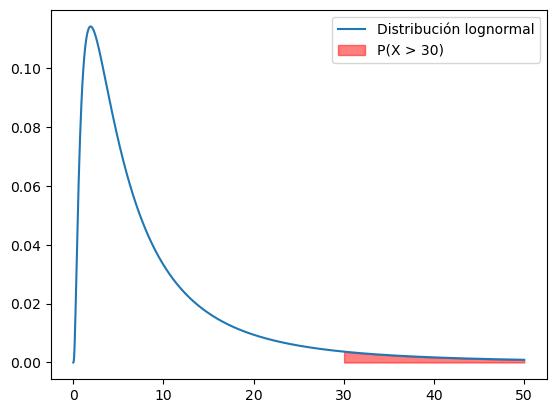

In [45]:
# Parámetros de la distribución lognormal
media = 10  # media
varianza = 200  # varianza

# Parámetros de la distribución normal correspondiente
mu = np.log(media**2 / np.sqrt(varianza + media**2))
sigma = np.sqrt(np.log(1 + varianza/media**2))

# Crear una distribución lognormal con los parámetros calculados
dist = lognorm(s=sigma, scale=np.exp(mu))

# Calcular la probabilidad de que la conductividad sea mayor que 30 m/d
p = 1 - dist.cdf(30)

# Definir los símbolos para las ecuaciones
m, v, mu_symbol, sigma_symbol, p_symbol = symbols('med var mu sigma P(x>30)')

# Mostrar las ecuaciones
print ("Ecuaciones implementadas")
display(Math(latex(Eq(mu_symbol, Eq(sp.log(m**2 / sp.sqrt(v + m**2)), mu)))))
display(Math(latex(Eq(sigma_symbol, Eq(sp.sqrt(sp.log(1 + v/m**2)), sigma)))))
display(Math(latex(Eq(p_symbol, p))))

# Generar valores para el eje x
x = np.linspace(0, 50, 1000)

# Calcular la función de densidad de probabilidad (PDF) para estos valores
pdf = dist.pdf(x)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar la PDF
ax.plot(x, pdf, label='Distribución lognormal')

# Rellenar el área bajo la curva donde la conductividad es mayor que 30 m/d
mask = x > 30
ax.fill_between(x[mask], pdf[mask], color='red', alpha=0.5, label='P(X > 30)')

# Añadir una leyenda
ax.legend()

# Mostrar la figura
plt.show()

<font size="3" > 3. La conductividad hidráulica para un acuífero tiene una distribución lognormal con media 10 m/d y varianza 200 m²/d². ¿Cuál es la probabilidad de que en una ubicación no observada la conductividad sea mayor que 30 m/d?

                         Conductividad hidraulica m/d

| Textura | 1x10^3 | 1x10^2 | 1x10^1 | 1x10^0 | 2x10^0 | 2x10^1 | 5x10^0  | 1x10^-2|
|---------|--------|--------|--------|--------|--------|--------|-------- |--------|
| Arena   |   0.0  |   0.0  |   0.0  |   0.1  |   0.4 |   0.3 |    0.1 |0.1|
| Arcilla |   0.3 |   0.4 |   0.2 |   0.1    |   0.0    |   0.0    |    0.0    |0.0|
| Turba   |   0.3 |   0.4 |   0.2 |   0.2    |   0.1    |   0.0    |    0.0    |0.0|

,K (m/d)
Variable en codigo,
PA,0.001
PB,0.010
PC,0.100
PD,1.000
PE,10.000
PF,20.000
PH,50.000
PI,100.000


,0.001,0.01,0.1,1,10,20,50,100
Material,,,,,,,,
Arena,0.0,0.0,0.0,0.1,0.4,0.3,0.1,0.1
Arcilla,0.3,0.4,0.2,0.1,0.0,0.0,0.0,0.0
Turba,0.1,0.3,0.3,0.2,0.1,0.0,0.0,0.0


,Material,0.001,0.01,0.1,1,10,20,50,100
0,Arena,0.00,0.00,0.00,0.07,0.28,0.21,0.07,0.07
1,Arcilla,0.06,0.08,0.04,0.02,0.00,0.00,0.00,0.00
2,Turba,0.01,0.03,0.03,0.02,0.01,0.00,0.00,0.00
Total,ArenaArcillaTurba,0.07,0.11,0.07,0.11,0.29,0.21,0.07,0.07


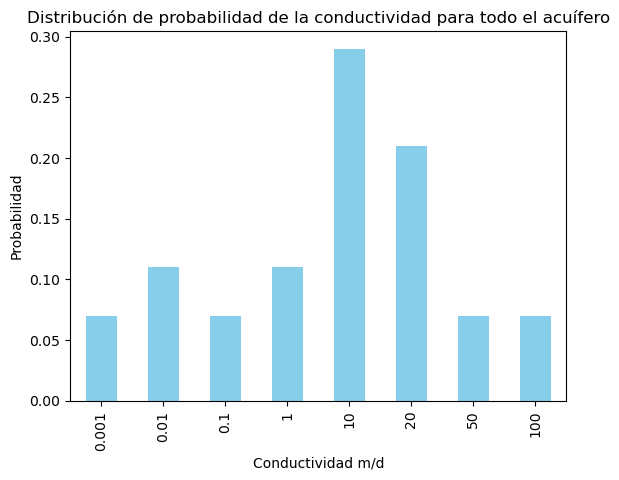

Ecuaciones implementadas en el ejercicio
PA = 0.2⋅Pr_PA_Arcilla + 0.7⋅Pr_PA_Arena + 0.1⋅Pr_PA_Turba
PB = 0.2⋅Pr_PB_Arcilla + 0.7⋅Pr_PB_Arena + 0.1⋅Pr_PB_Turba
PC = 0.2⋅Pr_PC_Arcilla + 0.7⋅Pr_PC_Arena + 0.1⋅Pr_PC_Turba
PD = 0.2⋅Pr_PD_Arcilla + 0.7⋅Pr_PD_Arena + 0.1⋅Pr_PD_Turba
PE = 0.2⋅Pr_PE_Arcilla + 0.7⋅Pr_PE_Arena + 0.1⋅Pr_PE_Turba
PF = 0.2⋅Pr_PF_Arcilla + 0.7⋅Pr_PF_Arena + 0.1⋅Pr_PF_Turba
PH = 0.2⋅Pr_PH_Arcilla + 0.7⋅Pr_PH_Arena + 0.1⋅Pr_PH_Turba
PI = 0.2⋅Pr_PI_Arcilla + 0.7⋅Pr_PI_Arena + 0.1⋅Pr_PI_Turba


In [46]:
# Crear el DataFrame con la información proporcionada al comienzo
data_k = {
    'Variable en codigo': ['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PH', 'PI'],
    'K (m/d)': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100]
}
df_k = pd.DataFrame(data_k)
display(df_k.set_index('Variable en codigo'))

# Crear el DataFrame con los datos proporcionados excluyendo PJ y cambiando las etiquetas
data = {
    'Material': ['Arena', 'Arcilla', 'Turba'],
    '0.001': [0, 0.3, 0.1],
    '0.01': [0, 0.4, 0.3],
    '0.1': [0, 0.2, 0.3],
    '1': [0.1, 0.1, 0.2],
    '10': [0.4, 0, 0.1],
    '20': [0.3, 0, 0],
    '50': [0.1, 0, 0],
    '100': [0.1, 0, 0]
}
df = pd.DataFrame(data)
display(df.set_index('Material'))

# Probabilidades de las clases de textura
Pr_Arena = 0.7
Pr_Arcilla = 0.2
Pr_Turba = 0.1

# Calcular la distribución de probabilidad de la conductividad para todo el acuífero
df_total = df.copy()
df_total.iloc[0, 1:] = df.iloc[0, 1:] * Pr_Arena
df_total.iloc[1, 1:] = df.iloc[1, 1:] * Pr_Arcilla
df_total.iloc[2, 1:] = df.iloc[2, 1:] * Pr_Turba
df_total.loc['Total', :] = df_total.sum(axis=0)

# Mostrar la distribución de probabilidad de la conductividad para todo el acuífero
display(df_total)

# Graficar la distribución de probabilidad
df_total.iloc[-1, 1:].plot(kind='bar', color='skyblue')
plt.title('Distribución de probabilidad de la conductividad para todo el acuífero')
plt.xlabel('Conductividad m/d')
plt.ylabel('Probabilidad')
plt.show()

# Definir los símbolos
PA, PB, PC, PD, PE, PF, PH, PI = symbols('PA PB PC PD PE PF PH PI')
Pr_PA_Arena, Pr_PB_Arena, Pr_PC_Arena, Pr_PD_Arena, Pr_PE_Arena, Pr_PF_Arena, Pr_PH_Arena, Pr_PI_Arena = symbols('Pr_PA_Arena Pr_PB_Arena Pr_PC_Arena Pr_PD_Arena Pr_PE_Arena Pr_PF_Arena Pr_PH_Arena Pr_PI_Arena')
Pr_PA_Arcilla, Pr_PB_Arcilla, Pr_PC_Arcilla, Pr_PD_Arcilla, Pr_PE_Arcilla, Pr_PF_Arcilla, Pr_PH_Arcilla, Pr_PI_Arcilla = symbols('Pr_PA_Arcilla Pr_PB_Arcilla Pr_PC_Arcilla Pr_PD_Arcilla Pr_PE_Arcilla Pr_PF_Arcilla Pr_PH_Arcilla Pr_PI_Arcilla')
Pr_PA_Turba, Pr_PB_Turba, Pr_PC_Turba, Pr_PD_Turba, Pr_PE_Turba, Pr_PF_Turba, Pr_PH_Turba, Pr_PI_Turba = symbols('Pr_PA_Turba Pr_PB_Turba Pr_PC_Turba Pr_PD_Turba Pr_PE_Turba Pr_PF_Turba Pr_PH_Turba Pr_PI_Turba')

# Mostrar las ecuaciones

print("Ecuaciones implementadas en el ejercicio")
eq_PA = Eq(PA, Pr_PA_Arena*Pr_Arena + Pr_PA_Arcilla*Pr_Arcilla + Pr_PA_Turba*Pr_Turba)
eq_PB = Eq(PB, Pr_PB_Arena*Pr_Arena + Pr_PB_Arcilla*Pr_Arcilla + Pr_PB_Turba*Pr_Turba)
eq_PC = Eq(PC, Pr_PC_Arena*Pr_Arena + Pr_PC_Arcilla*Pr_Arcilla + Pr_PC_Turba*Pr_Turba)
eq_PD = Eq(PD, Pr_PD_Arena*Pr_Arena + Pr_PD_Arcilla*Pr_Arcilla + Pr_PD_Turba*Pr_Turba)
eq_PE = Eq(PE, Pr_PE_Arena*Pr_Arena + Pr_PE_Arcilla*Pr_Arcilla + Pr_PE_Turba*Pr_Turba)
eq_PF = Eq(PF, Pr_PF_Arena*Pr_Arena + Pr_PF_Arcilla*Pr_Arcilla + Pr_PF_Turba*Pr_Turba)
eq_PH = Eq(PH, Pr_PH_Arena*Pr_Arena + Pr_PH_Arcilla*Pr_Arcilla + Pr_PH_Turba*Pr_Turba)
eq_PI = Eq(PI, Pr_PI_Arena*Pr_Arena + Pr_PI_Arcilla*Pr_Arcilla + Pr_PI_Turba*Pr_Turba)

pprint(eq_PA, use_unicode=True)
pprint(eq_PB, use_unicode=True)
pprint(eq_PC, use_unicode=True)
pprint(eq_PD, use_unicode=True)
pprint(eq_PE, use_unicode=True)
pprint(eq_PF, use_unicode=True)
pprint(eq_PH, use_unicode=True)
pprint(eq_PI, use_unicode=True)

<font size="3" > 4. Considerar dos variables aleatorias Z1 y Z2 con media 10 y 25 y varianzas 300 y 450 respectivamente. El
coeficiente de correlación entre ambas variables es igual a 0.7.

a. Calcular la covarianza entre Z1 y Z2.

b. Calcular el valor esperado de Y = Z1 + Z2.

c. Calcular la varianza de Y = Z1 + Z2.

In [47]:
# Definimos las variables
media_Z1 = 10
media_Z2 = 25
var_Z1 = 300
var_Z2 = 450
rho_Z1_Z2 = 0.7

# a. Calculamos la covarianza entre Z1 y Z2
cov_Z1_Z2 = rho_Z1_Z2 * math.sqrt(var_Z1 * var_Z2)
print(f'La covarianza entre Z1 y Z2 es: {cov_Z1_Z2}')

# b. Calculamos el valor esperado de Y = Z1 + Z2
E_Y = media_Z1 + media_Z2
print(f'El valor esperado de Y = Z1 + Z2 es: {E_Y}')

# c. Calculamos la varianza de Y = Z1 + Z2
var_Y = var_Z1 + var_Z2 + 2 * cov_Z1_Z2
print(f'La varianza de Y = Z1 + Z2 es: {var_Y}')

La covarianza entre Z1 y Z2 es: 257.1964229922337
El valor esperado de Y = Z1 + Z2 es: 35
La varianza de Y = Z1 + Z2 es: 1264.3928459844674


<font size="3" > 5. Suponer que están distribuidas de manera gaussiana bivariada y:

a. Calcular Pr[Z1 < 30]

b. Calcular Pr[Z2 < 40]

c. Calcular la probabilidad Pr[Z1 + Z2 < 50]

d. Calcular la probabilidad Pr[Z1 < 30 ⋂ Z2 < 40]

e. Calcular la probabilidad Pr[Z1 < 30 ⋃ Z2 < 40]

Pr[Z1 < 30] = 0.8758934605050381
Pr[Z2 < 40] = 0.7602499389065233
Pr[Z1 + Z2 < 50] = 0.663429977707377
Pr[Z1 < 30 ⋂ Z2 < 40] = 0.7250939379551612
Pr[Z1 < 30 ⋃ Z2 < 40] = 0.9110494614564001


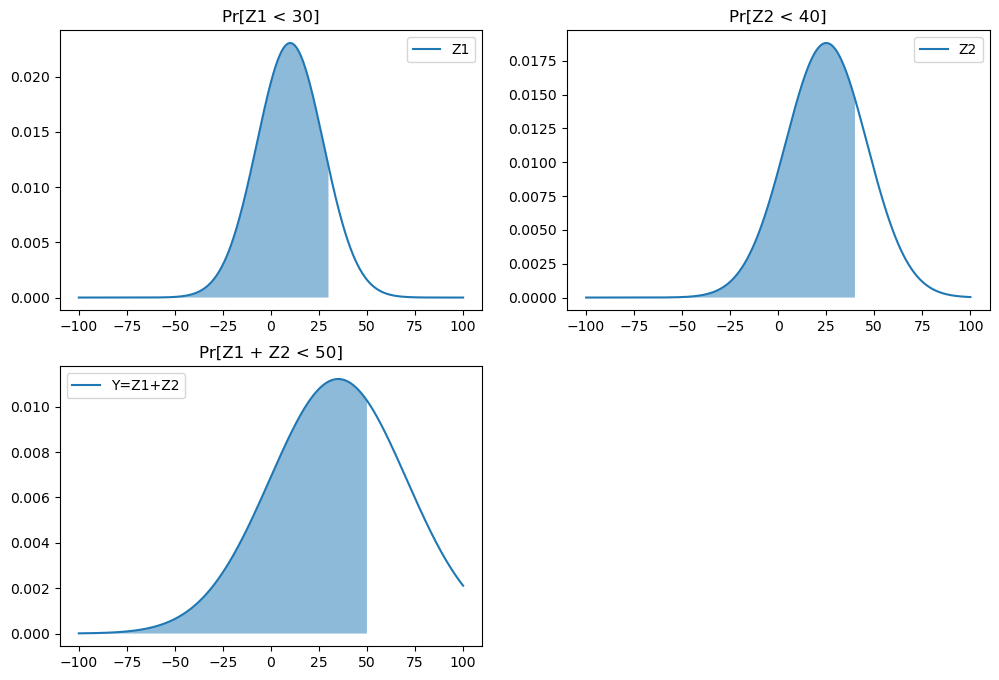

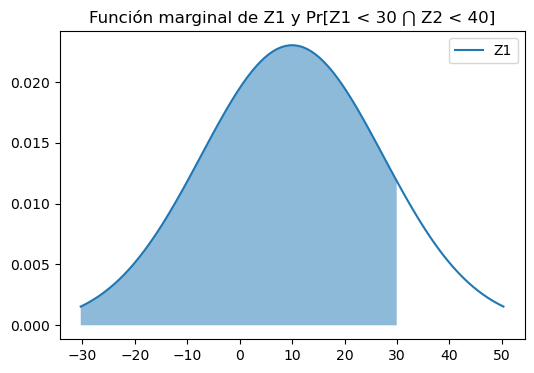

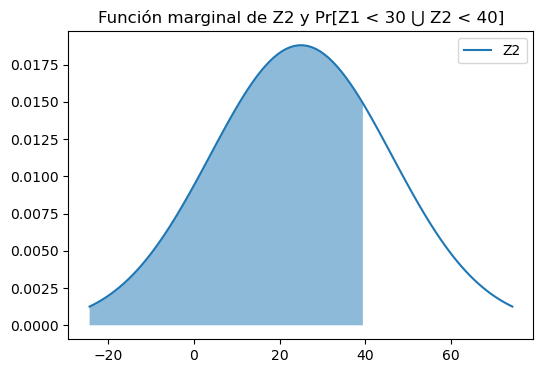

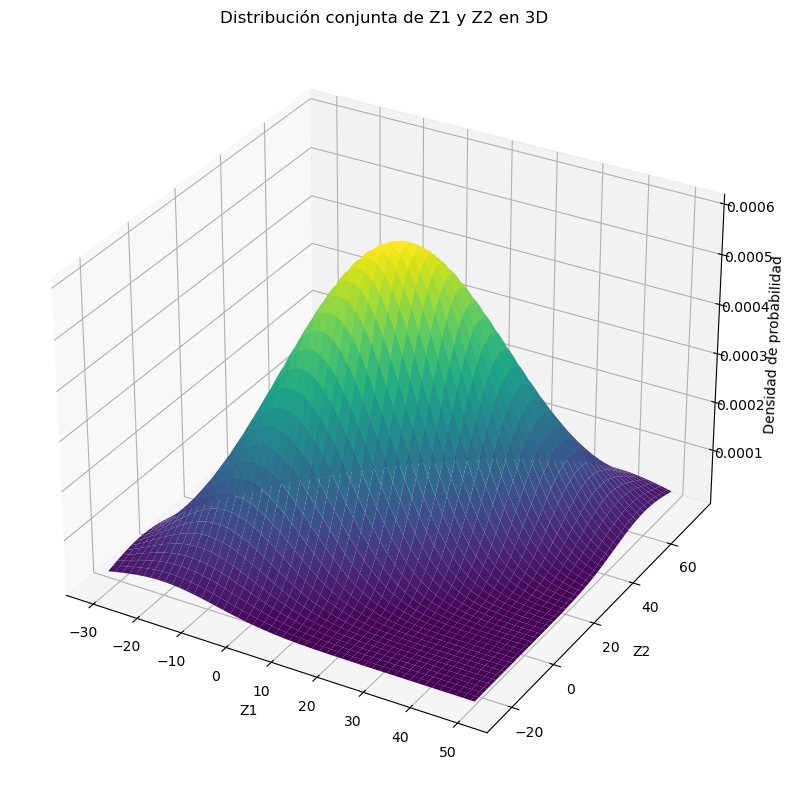

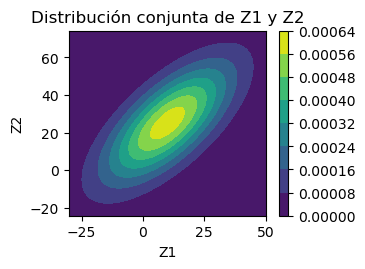

In [49]:
# Definimos las variables
media_Z1 = 10
media_Z2 = 25
var_Z1 = 300
var_Z2 = 450
rho_Z1_Z2 = 0.7

# Creamos las distribuciones normales para Z1 y Z2
Z1 = stats.norm(loc=media_Z1, scale=np.sqrt(var_Z1))
Z2 = stats.norm(loc=media_Z2, scale=np.sqrt(var_Z2))

# a. Calculamos Pr[Z1 < 30]
prob_Z1_less_30 = Z1.cdf(30)
print(f'Pr[Z1 < 30] = {prob_Z1_less_30}')

# b. Calculamos Pr[Z2 < 40]
prob_Z2_less_40 = Z2.cdf(40)
print(f'Pr[Z2 < 40] = {prob_Z2_less_40}')

# c. Calculamos la probabilidad Pr[Z1 + Z2 < 50]
media_Y = media_Z1 + media_Z2
var_Y = var_Z1 + var_Z2 + 2 * rho_Z1_Z2 * np.sqrt(var_Z1 * var_Z2)
Y = stats.norm(loc=media_Y, scale=np.sqrt(var_Y))
prob_Y_less_50 = Y.cdf(50)
print(f'Pr[Z1 + Z2 < 50] = {prob_Y_less_50}')

# Creamos la distribución normal bivariada para Z1 y Z2
rv = stats.multivariate_normal([media_Z1, media_Z2], [[var_Z1, rho_Z1_Z2 * np.sqrt(var_Z1 * var_Z2)], [rho_Z1_Z2 * np.sqrt(var_Z1 * var_Z2), var_Z2]])

# d. Calculamos Pr[Z1 < 30 ⋂ Z2 < 40]
prob_Z1_less_30_and_Z2_less_40 = rv.cdf([30, 40])
print(f'Pr[Z1 < 30 ⋂ Z2 < 40] = {prob_Z1_less_30_and_Z2_less_40}')

# e. Calculamos Pr[Z1 < 30 ⋃ Z2 < 40]
# Usamos la fórmula de la probabilidad de la unión de dos eventos: Pr[A ⋃ B] = Pr[A] + Pr[B] - Pr[A ⋂ B]
prob_Z1_less_30_or_Z2_less_40 = prob_Z1_less_30 + prob_Z2_less_40 - prob_Z1_less_30_and_Z2_less_40
print(f'Pr[Z1 < 30 ⋃ Z2 < 40] = {prob_Z1_less_30_or_Z2_less_40}')

# Ahora generamos las gráficas
x = np.linspace(-100, 100, 1000)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, Z1.pdf(x), label='Z1')
plt.fill_between(x, Z1.pdf(x), where=(x<30), alpha=0.5)
plt.title('Pr[Z1 < 30]')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, Z2.pdf(x), label='Z2')
plt.fill_between(x, Z2.pdf(x), where=(x<40), alpha=0.5)
plt.title('Pr[Z2 < 40]')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, Y.pdf(x), label='Y=Z1+Z2')
plt.fill_between(x, Y.pdf(x), where=(x<50), alpha=0.5)
plt.title('Pr[Z1 + Z2 < 50]')
plt.legend()

# Para los puntos d y e, necesitamos graficar la distribución conjunta de Z1 y Z2
Z1_values = np.linspace(Z1.ppf(0.01), Z1.ppf(0.99), 100)
Z2_values = np.linspace(Z2.ppf(0.01), Z2.ppf(0.99), 100)
z1, z2 = np.meshgrid(Z1_values, Z2_values)
pos = np.dstack((z1, z2))

# d. Graficamos la función marginal de Z1 y la probabilidad Pr[Z1 < 30 ⋂ Z2 < 40]
plt.figure(figsize=(6, 4))  # Creamos una nueva figura
plt.plot(Z1_values, Z1.pdf(Z1_values), label='Z1')
plt.fill_between(Z1_values, Z1.pdf(Z1_values), where=(Z1_values<30), alpha=0.5)
plt.title('Función marginal de Z1 y Pr[Z1 < 30 ⋂ Z2 < 40]')
plt.legend()

# e. Graficamos la función marginal de Z2 y la probabilidad Pr[Z1 < 30 ⋃ Z2 < 40]
plt.figure(figsize=(6, 4))  # Creamos una nueva figura
plt.plot(Z2_values, Z2.pdf(Z2_values), label='Z2')
plt.fill_between(Z2_values, Z2.pdf(Z2_values), where=(Z2_values<40), alpha=0.5)
plt.title('Función marginal de Z2 y Pr[Z1 < 30 ⋃ Z2 < 40]')
plt.legend()

# Graficamos la función en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(z1, z2, rv.pdf(pos), cmap='viridis')
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Densidad de probabilidad')
ax.set_title('Distribución conjunta de Z1 y Z2 en 3D')

plt.tight_layout()
plt.show()

# Para los puntos d y e, necesitamos graficar la distribución conjunta de Z1 y Z2
Z1_values = np.linspace(Z1.ppf(0.01), Z1.ppf(0.99), 100)
Z2_values = np.linspace(Z2.ppf(0.01), Z2.ppf(0.99), 100)
z1, z2 = np.meshgrid(Z1_values, Z2_values)
pos = np.dstack((z1, z2))
plt.subplot(2, 2, 4)
plt.contourf(z1, z2, rv.pdf(pos))
plt.colorbar()
plt.title('Distribución conjunta de Z1 y Z2')
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.tight_layout()
plt.show()

